# Mini Program - Image Detection using Python

Objective -

This program will deal with Image detection and Extraction 
It will detect various objects of interest and store them in separate image files
We will use ImageAI library

ImageAI is a Python Library. It is a powerful library that can be used by developers to support deep learning and computer vision. 
More about it can be found in the following link - [https://github.com/OlafenwaMoses/ImageAI]

Need to install ImageAI as pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.1/imageai-2.0.1-py3-none-any.whl

We will require a pretrained model to generate predictions for new images. There are three types of pre trained models. They are -

a) RetinaNet - resnet50_coco_best_v2.0.1.h5

b) YOLOv3 - yolo.h5

c) TinyYOLOv3 - yolo-tiny.h5

These pre-trained model need to be downloaded from site and kept in the same folder from where the python file is running. They can detect 80 different kind of everyday objects

We will use RetinaNet pretrained model

# Step 1 - Import required libraries

Libraries are the modules that are available in Python to help programmer perform specific operations.

In this program, we are making use 2 libraries

    - ObjectDetection library from imageai.Detection
    - Image library from IPython.display. This library has been used to print the new image created with detected objects

Note: When encoutering error, install the dependent libraries appearing in the error. We faced two errors here and this is how we fixed it

-conda install opencv (It may take around 40 mins to complete)

-conda install keras

In [2]:
from imageai.Detection import ObjectDetection
from IPython.display import Image

Using TensorFlow backend.


# Step 2 - Create a detector

In Line 1 - Initiate ObjectDetection

In Line 2 - Set the model type as RetinaNet as we are using RetinaNet Model. Otherwise we could use setModelTypeAsYOLOv3() or setModelTypeAsTinyYOLOv3() based on YOLO or TinyYOLO respectively

In Line 3 - Set the model path. It can be resnet50_coco_best_v2.0.1.h5 or yolo.h5 or yolo-tiny.h5 based on pre-trained model chosen

In Line 4 - Load the model

In [3]:
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath("resnet50_coco_best_v2.0.1.h5")
detector.loadModel()

# Step 3 - Get detections

There are 80 possible objects that can be detected using Pre-trained model. These are - 

person,   bicycle,   car,   motorcycle,   airplane,
bus,   train,   truck,   boat,   traffic light,   fire hydrant,   stop_sign,
parking meter,   bench,   bird,   cat,   dog,   horse,   sheep,   cow,   elephant,   bear,   zebra,
giraffe,   backpack,   umbrella,   handbag,   tie,   suitcase,   frisbee,   skis,   snowboard,
sports ball,   kite,   baseball bat,   baseball glove,   skateboard,   surfboard,   tennis racket,
bottle,   wine glass,   cup,   fork,   knife,   spoon,   bowl,   banana,   apple,   sandwich,   orange,
broccoli,   carrot,   hot dog,   pizza,   donot,   cake,   chair,   couch,   potted plant,   bed,
dining table,   toilet,   tv,   laptop,   mouse,   remote,   keyboard,   cell phone,   microwave,
oven,   toaster,   sink,   refrigerator,   book,   clock,   vase,   scissors,   teddy bear,   hair dryer,
toothbrush.

In Line 1 - CustomObjects can help us detect only selected number of Objects. Suppose, we want to detect apple,orange and banana. Then these three must be set to True

In Line 2 - detectCustomObjectsFromImage function accepts 
            - input image
            - create an optional output image which is stored in the same path from where python file is run
            - It accepts the custom objects chosen above
            - Minimum Percentage Probability determines integrity of detection results

In Line 3 - Each object in detection is iterated to get the name of the object and how accurately they have been predicted

In Line 4 - The output image is printed with detected object

Note- In Line 2, where output_image_path variable was used, the type of the variable should be png as JPEG/JPG was generating errors. Whereas type of input image could be JPG/JPEG and png

orange : 91.4738535881
--------------------------------
orange : 96.9522714615
--------------------------------
apple : 86.9643211365
--------------------------------
banana : 92.5892591476
--------------------------------


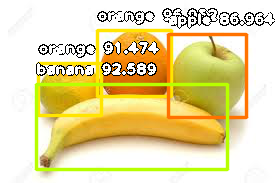

In [10]:
custom_objects = detector.CustomObjects(apple=True, orange=True, banana=True)

detections = detector.detectCustomObjectsFromImage(input_image="image_fruit.jpg", 
                                                   output_image_path="image_fruit_new.png", 
                                                   custom_objects=custom_objects, 
                                                   minimum_percentage_probability=65)

for eachObject in detections:
   print(eachObject["name"] + " : " + eachObject["percentage_probability"] )
   print("--------------------------------")

Image("image_fruit_new.png")